In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\Abel\Downloads\gas_turbines.csv")

In [3]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


<AxesSubplot:>

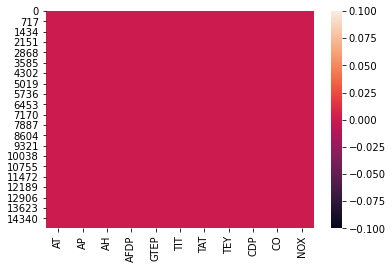

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.shape

(15039, 11)

<AxesSubplot:xlabel='TEY', ylabel='Count'>

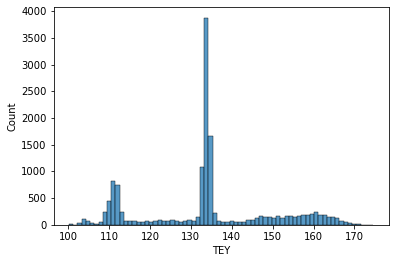

In [7]:
sns.histplot(x='TEY',data=df)

In [8]:
x=df.iloc[:,0:3]
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_std=std.fit_transform(x)
X=x_std
Y=df.iloc[:,-4].values

## Grid Search for best epochs and batch size

In [9]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam

In [10]:
def create_model():    
    model=Sequential()
    model.add(Dense(10,input_dim=3,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(12,activation='relu'))
    model.add(Dense(1,activation='linear'))

    model.compile(loss ='mean_squared_error',optimizer=Adam(learning_rate=0.5),metrics=['mse'])
    return model

In [11]:
kr=KerasRegressor(build_fn=create_model)

In [12]:
grid=GridSearchCV(estimator=kr,param_grid={'epochs':[10,50,60,100],'batch_size':[1000,3000,5000]})

In [13]:
grid.fit(X,Y)

Epoch 1/10
13/13 [==============================] - 0s 831us/step - loss: 14980.0608 - mse: 14980.0608
Epoch 2/10
13/13 [==============================] - 0s 665us/step - loss: 4019.0429 - mse: 4019.0429
Epoch 3/10
13/13 [==============================] - 0s 665us/step - loss: 961.8724 - mse: 961.8724
Epoch 4/10
13/13 [==============================] - 0s 748us/step - loss: 363.6160 - mse: 363.6160
Epoch 5/10
13/13 [==============================] - 0s 748us/step - loss: 242.4973 - mse: 242.4973
Epoch 6/10
13/13 [==============================] - 0s 748us/step - loss: 213.5000 - mse: 213.5000
Epoch 7/10
13/13 [==============================] - 0s 665us/step - loss: 209.2678 - mse: 209.2678
Epoch 8/10
13/13 [==============================] - 0s 665us/step - loss: 200.6908 - mse: 200.6908
Epoch 9/10
13/13 [==============================] - 0s 665us/step - loss: 202.0493 - mse: 202.0493
Epoch 10/10
4/4 [==============================] - 0s 998us/step - loss: 306.6729 - mse: 306.6729
Epoch

GridSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001B7DD724F40>,
             param_grid={'batch_size': [1000, 3000, 5000],
                         'epochs': [10, 50, 60, 100]})

In [14]:
grid.best_params_ , grid.best_score_

({'batch_size': 5000, 'epochs': 50}, -230.8482681274414)

## Grid Search for best learning rate and kernel initializer

In [15]:
def create_model1(init,learning_rate):    
    model1=Sequential()
    model1.add(Dense(10,input_dim=3,kernel_initializer=init,activation='relu'))
    model1.add(Dense(8,activation='relu'))
    model1.add(Dense(12,activation='relu'))
    model1.add(Dense(1,activation='linear'))

    model1.compile(loss ='mean_squared_error',optimizer=Adam(learning_rate),metrics=['mse'])
    return model1

In [16]:
kr1=KerasRegressor(build_fn=create_model1)
grid1=GridSearchCV(estimator=kr1,param_grid={'learning_rate':[0.001,0.5,1],'init':['normal','zero','uniform']})

In [17]:
grid1.fit(X,Y)

470/470 [==============================] - 1s 415us/step - loss: 1100.0934 - mse: 1100.0934


GridSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001B7EDFC4520>,
             param_grid={'init': ['normal', 'zero', 'uniform'],
                         'learning_rate': [0.001, 0.5, 1]})

In [18]:
grid1.best_score_ , grid1.best_params_

(-237.26986083984374, {'init': 'normal', 'learning_rate': 0.5})

## Final Model

In [19]:
    model_fin=Sequential()
    model_fin.add(Dense(10,input_dim=3,kernel_initializer='uniform',activation='relu'))
    model_fin.add(Dense(8,activation='relu'))
    model_fin.add(Dense(12,activation='relu'))
    model_fin.add(Dense(1,activation='linear'))

    model_fin.compile(loss ='mean_squared_error',optimizer=Adam(learning_rate=0.5),metrics=['mse'])
   

In [20]:
model_fin.fit(X,Y)

470/470 [==============================] - 0s 409us/step - loss: 3594.8669 - mse: 3594.8669


In [21]:
y_pred=model_fin.predict(X)
y_pred

array([[146.1783 ],
       [146.02982],
       [145.7893 ],
       ...,
       [146.33467],
       [146.40837],
       [146.3767 ]], dtype=float32)

In [22]:
model_fin.evaluate(X,Y)

470/470 [==============================] - 0s 327us/step - loss: 293.5590 - mse: 293.5590


[293.5589599609375, 293.5589599609375]